# 03-05 : Time Series Analysis

referece: [Lecture 4: Pre-processing and advanced indexing](https://learn.london.ac.uk/mod/page/view.php?id=111306&forceview=1)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

### Functions

In [2]:
def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
    """Set the specified column to be a category type."""
    dataframe[column_name] = dataframe[column_name].astype('category')

### Hellopter

In [3]:
# load the classified hellopeter data
df_hellopeter = pd.read_parquet('../../data/interim/01-06_human_classified.parquet')
df_hellopeter.set_index('id', inplace=True)

# show the data loaded
print(df_hellopeter.shape)
display(df_hellopeter.head(3))

(235, 16)


,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion,human_chatbot_classification,human_complaint_classification
id,,,,,,,,,,,,,,,,
3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...,"limited functionality, unable to contact human...",blacklist
3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...,"technical error, unable to contact human agent",missing airtime
3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...,"limited functionality, unable to contact human...",voice bundle


In [4]:
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    object        
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    object        
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    object        
 11  c

In [5]:
def set_hellopeter_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'business_slug')
    set_category(df_result, 'chatbot_classification')
    set_category(df_result, 'complaint_classification')
    set_category(df_result, 'complaint_service')
    set_category(df_result, 'human_chatbot_classification')
    set_category(df_result, 'human_complaint_classification')

    return df_result

# set the categorical columns
df_hellopeter = set_hellopeter_categorical(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

In [6]:
def set_hellopeter_boolean(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Update the datatype of boolean columns"""
    df_result = dataframe.copy()
    df_result['chatbot_related'] = df_result['chatbot_related'].astype('bool')

    return df_result

# set the boolean columns
df_hellopeter = set_hellopeter_boolean(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    bool          
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

### Hellopeter Aspect Based Sentiment Analysis data

In [7]:
# load the hellopeter aspect based sentiment analysis data
df_hellopeter_absa = pd.read_parquet('../../data/interim/01-09_absa.parquet')

print(df_hellopeter_absa.shape)
display(df_hellopeter_absa.head())

(1595, 4)


,id,entity,aspect,polarity
0,3344640,Customer Service,"Availability (e.g., 24/7 support)",Negative
1,3344640,Chatbots,User-friendliness,Negative
2,3344640,Chatbots,Ability to understand query,Negative
3,3347241,Billing & Payments,Refunds/credits,Negative
4,3347241,Customer Service,Responsiveness,Negative


In [8]:
def set_hellopeter_absa_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'entity')
    set_category(df_result, 'aspect')
    set_category(df_result, 'polarity')

    return df_result

# set the categorical columns
df_hellopeter_absa = set_hellopeter_absa_categorical(df_hellopeter_absa)
df_hellopeter_absa.info()

display(df_hellopeter_absa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        1595 non-null   int64   
 1   entity    1595 non-null   category
 2   aspect    1595 non-null   category
 3   polarity  1595 non-null   category
dtypes: category(3), int64(1)
memory usage: 19.1 KB


,id,entity,aspect,polarity
0,3344640,Customer Service,"Availability (e.g., 24/7 support)",Negative
1,3344640,Chatbots,User-friendliness,Negative
2,3344640,Chatbots,Ability to understand query,Negative
3,3347241,Billing & Payments,Refunds/credits,Negative
4,3347241,Customer Service,Responsiveness,Negative


#### Data Perpetration

In [9]:
df_hellopeter_merged = pd.merge(df_hellopeter, df_hellopeter_absa, on='id', how='left')

#### Data Analysis

**Descriptive Statistics**: Start by getting a sense of the data distribution.

In [10]:
print(df_hellopeter_merged.describe())

                 id                     created_at  review_rating
count  1.595000e+03                           1595    1595.000000
mean   3.925785e+06  2022-04-29 23:45:41.296551936       1.062069
min    3.344640e+06            2021-01-07 13:22:34       1.000000
25%    3.660094e+06            2021-10-08 10:37:19       1.000000
50%    3.908402e+06            2022-04-29 08:47:29       1.000000
75%    4.220536e+06            2022-12-10 20:11:47       1.000000
max    4.522620e+06            2023-07-20 15:05:44       5.000000
std    3.266055e+05                            NaN       0.360238


**Aspect Frequency**: Check which aspects are mentioned most frequently.

In [11]:
hellopeter_aspect_counts = df_hellopeter_merged['aspect'].value_counts()
print(hellopeter_aspect_counts)

aspect
Ability to understand query                221
Responsiveness                             219
User-friendliness                          197
Response accuracy                          189
Knowledge/competence                        98
Availability (e.g., 24/7 support)           94
Account management (online portal/apps)     90
Escalation to human agents                  76
Billing accuracy                            49
Refunds/credits                             42
Resolution time                             37
Friendliness/professionalism                32
Speed of response                           30
Upgrade/downgrade process                   21
Hidden charges                              18
Signal strength                             16
Plan pricing                                15
Device reliability                          15
Monthly costs                               15
Plan flexibility                            13
Data speeds (4G, 5G, etc.)                  13
Networ

**Sentiment Distribution**: Check the distribution of sentiments across all feedback.

In [12]:
hellopeter_sentiment_counts = df_hellopeter_merged['polarity'].value_counts()
print(hellopeter_sentiment_counts)

polarity
Negative    1516
Neutral       61
Positive      16
Mixed          2
Name: count, dtype: int64


#### Data Visualization

Entity Frequency Bar Chart

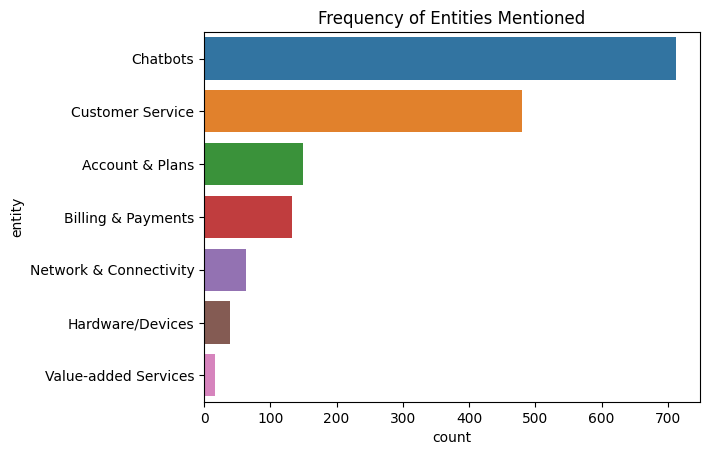

In [13]:
sns.countplot(
    data=df_hellopeter_merged,
    y='entity',
    order=df_hellopeter_merged['entity'].value_counts().index)
plt.title('Frequency of Entities Mentioned')
plt.show()

Aspect Frequency Bar Chart

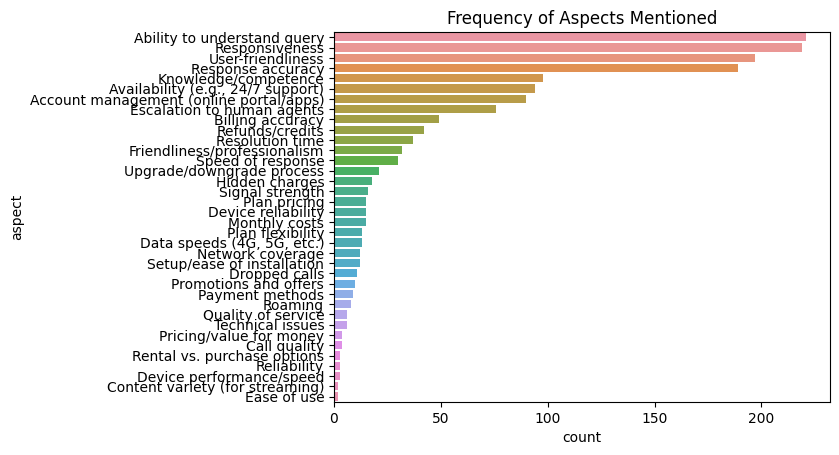

In [14]:
sns.countplot(
    data=df_hellopeter_merged,
    y='aspect',
    order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Frequency of Aspects Mentioned')
plt.show()

Sentiment Distribution Pie Chart

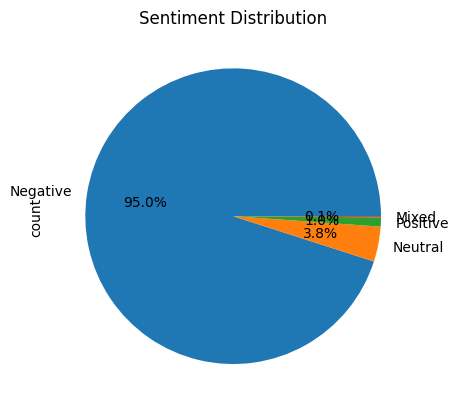

In [15]:
hellopeter_sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

Entity-wise Sentiment Distribution

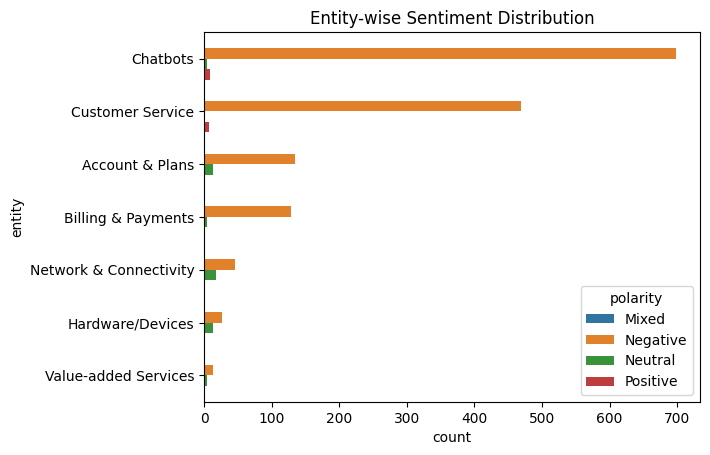

In [16]:
sns.countplot(
    data=df_hellopeter_merged,
    y='entity',
    hue='polarity',
    order=df_hellopeter_merged['entity'].value_counts().index)

plt.title('Entity-wise Sentiment Distribution')
plt.show()

Aspect-wise Sentiment Distribution

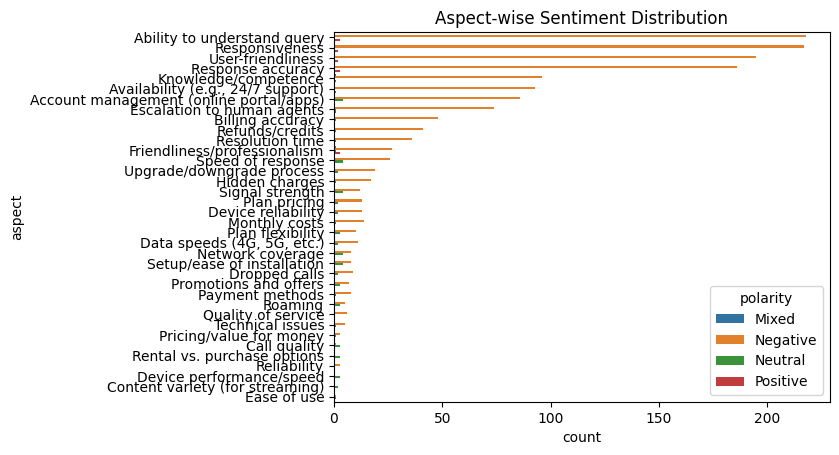

In [17]:
sns.countplot(
    data=df_hellopeter_merged,
    y='aspect',
    hue='polarity',
    order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Aspect-wise Sentiment Distribution')
plt.show()

Review Rating Distribution

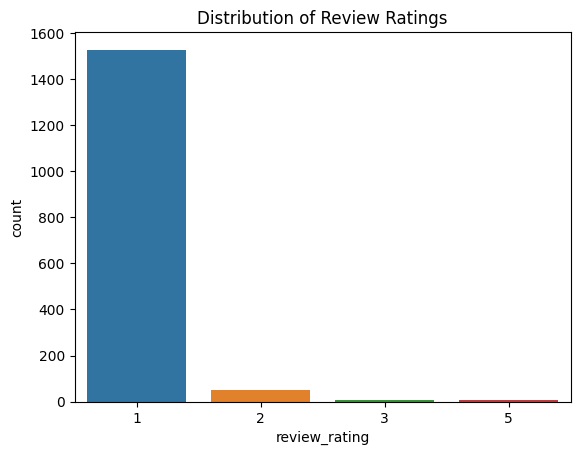

In [18]:
sns.countplot(data=df_hellopeter_merged, x='review_rating')
plt.title('Distribution of Review Ratings')
plt.show()

#### Advanced Analysis

Average Review Rating by Aspect

In [19]:
avg_rating_by_aspect = df_hellopeter_merged \
    .groupby('aspect')['review_rating'] \
    .mean() \
    .sort_values(ascending=False)
print(avg_rating_by_aspect)

aspect
Technical issues                           1.166667
Friendliness/professionalism               1.156250
Escalation to human agents                 1.105263
Availability (e.g., 24/7 support)          1.095745
Setup/ease of installation                 1.083333
Resolution time                            1.081081
Data speeds (4G, 5G, etc.)                 1.076923
Ability to understand query                1.072398
Refunds/credits                            1.071429
Account management (online portal/apps)    1.066667
Response accuracy                          1.063492
Knowledge/competence                       1.061224
User-friendliness                          1.060914
Responsiveness                             1.059361
Hidden charges                             1.055556
Speed of response                          1.033333
Billing accuracy                           1.020408
Rental vs. purchase options                1.000000
Upgrade/downgrade process                  1.000000
Signa

#### Entity and Aspect

In [20]:
df_hellopeter_merged.entity.value_counts()

entity
Chatbots                  713
Customer Service          480
Account & Plans           149
Billing & Payments        133
Network & Connectivity     64
Hardware/Devices           39
Value-added Services       17
Name: count, dtype: int64

In [21]:
categories = df_hellopeter_merged \
    .groupby(['entity', 'aspect'])['id'] \
    .count() \
    .reset_index() \
    .rename(columns={'id': 'count'}) \
    .sort_values(['entity', 'count'], ascending=[True, False])

display(categories)

,entity,aspect,count
1,Account & Plans,Account management (online portal/apps),90
34,Account & Plans,Upgrade/downgrade process,21
19,Account & Plans,Plan pricing,15
18,Account & Plans,Plan flexibility,13
21,Account & Plans,Promotions and offers,10
...,...,...,...
247,Value-added Services,Signal strength,0
248,Value-added Services,Speed of response,0
249,Value-added Services,Technical issues,0
250,Value-added Services,Upgrade/downgrade process,0


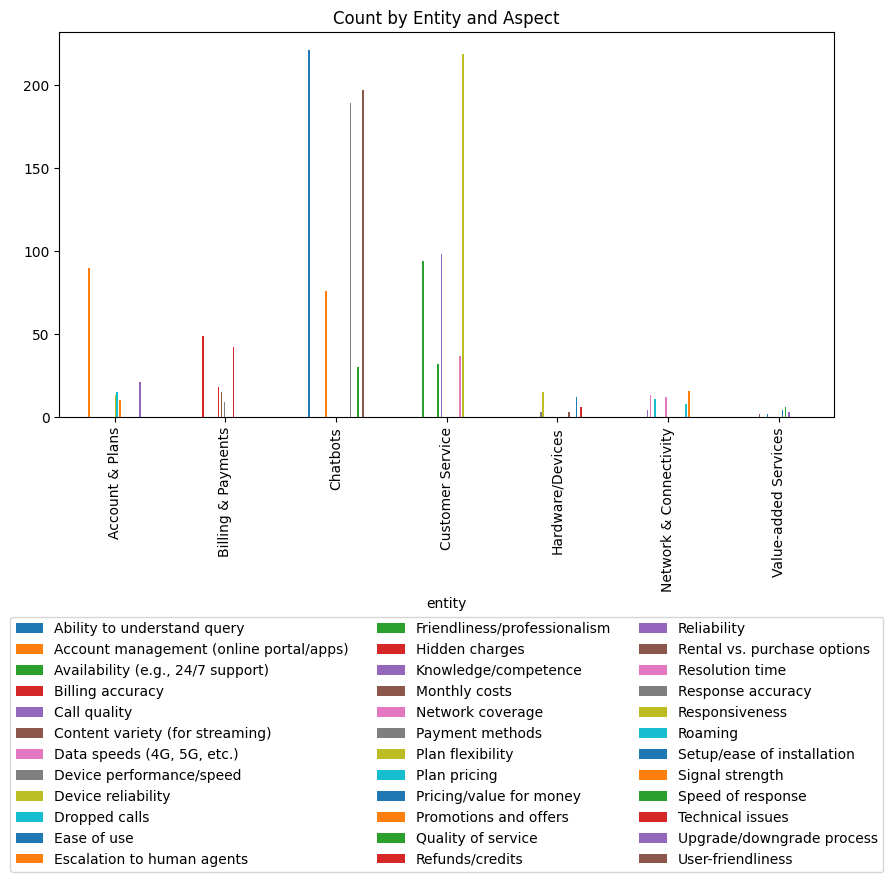

In [22]:
df_hellopeter_merged \
    .groupby(['entity', 'aspect'])['id'] \
    .count() \
    .unstack() \
    .plot(kind='bar', figsize=(10, 5))
plt.title('Count by Entity and Aspect')

# show the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

plt.show()


## Entities Over Time

In [23]:
# select only the relevant columns for the analysis
df_hp_analysis = df_hellopeter_merged[[
    'id',
    'created_at',
    'review_rating',
    'business_slug',
    'entity',
    'aspect',
    'polarity'
]]

# convert polarity to numbers
df_hp_analysis['polarity_num'] = df_hp_analysis['polarity'].replace({
    'Positive': 1,
    'Mixed': 0.5,
    'Neutral': 0,
    'Negative': -1
}).astype('float')

# show the table
df_hp_analysis.head()

/tmp/ipykernel_37249/3922796219.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hp_analysis['polarity_num'] = df_hp_analysis['polarity'].replace({


,id,created_at,review_rating,business_slug,entity,aspect,polarity,polarity_num
0,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,"Availability (e.g., 24/7 support)",Negative,-1.0
1,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,User-friendliness,Negative,-1.0
2,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,Ability to understand query,Negative,-1.0
3,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,Refunds/credits,Negative,-1.0
4,3347241,2021-01-10 11:32:59,1,vodacom,Customer Service,Responsiveness,Negative,-1.0


In [103]:
# summarise by entity
df_hp_entity_sum = df_hp_analysis \
    .groupby([
        'id',
        'created_at',
        'review_rating',
        'business_slug',
        'entity'])['polarity_num'] \
    .mean() \
    .reset_index() \
    .dropna()

display(df_hp_entity_sum.head())

,id,created_at,review_rating,business_slug,entity,polarity_num
30,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,-1.0
31,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,-1.0
33068,3347241,2021-01-10 11:32:59,1,vodacom,Account & Plans,-1.0
33069,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,-1.0
33070,3347241,2021-01-10 11:32:59,1,vodacom,Chatbots,-1.0


In [104]:
df_hp_entity_sum.polarity_num.value_counts()

polarity_num
-1.000000    725
 0.000000     16
 1.000000      6
-0.800000      4
-0.600000      4
-0.400000      2
-0.200000      1
-0.500000      1
-0.333333      1
-0.250000      1
Name: count, dtype: int64

In [106]:
# map back to valid polarity values
df_hp_entity_sum = map_polarity_nums(df_hp_entity_sum, 'polarity_num')
df_hp_entity_sum.polarity_num.value_counts()

polarity_num
-1.0    729
 0.0     18
 0.5      8
 1.0      6
Name: count, dtype: int64

### Factor Plot

In [138]:
# resample the data to monthly
df_hp_entity_monthly = df_hp_entity_sum \
    .drop(columns=['id']) \
    .groupby([
        'business_slug',
        'entity']) \
    .resample('M', on='created_at') \
    .mean() \
    .reset_index() \
    .dropna()

# map the polarity back to the expected categories
df_hp_entity_monthly = map_polarity_nums(df_hp_entity_monthly, 'polarity_num')

# add the month and year columns
df_hp_entity_monthly['month'] = df_hp_entity_monthly['created_at'].dt.month
df_hp_entity_monthly['year'] = df_hp_entity_monthly['created_at'].dt.year

# display the head
df_hp_entity_monthly.head()

,business_slug,entity,created_at,review_rating,polarity_num,month,year
0,cell-c,Account & Plans,2022-07-31,1.0,-1.0,7,2022
9,cell-c,Account & Plans,2023-04-30,1.0,-1.0,4,2023
10,cell-c,Chatbots,2022-07-31,1.0,-1.0,7,2022
19,cell-c,Chatbots,2023-04-30,1.0,-1.0,4,2023
20,cell-c,Customer Service,2022-07-31,1.0,-1.0,7,2022


/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


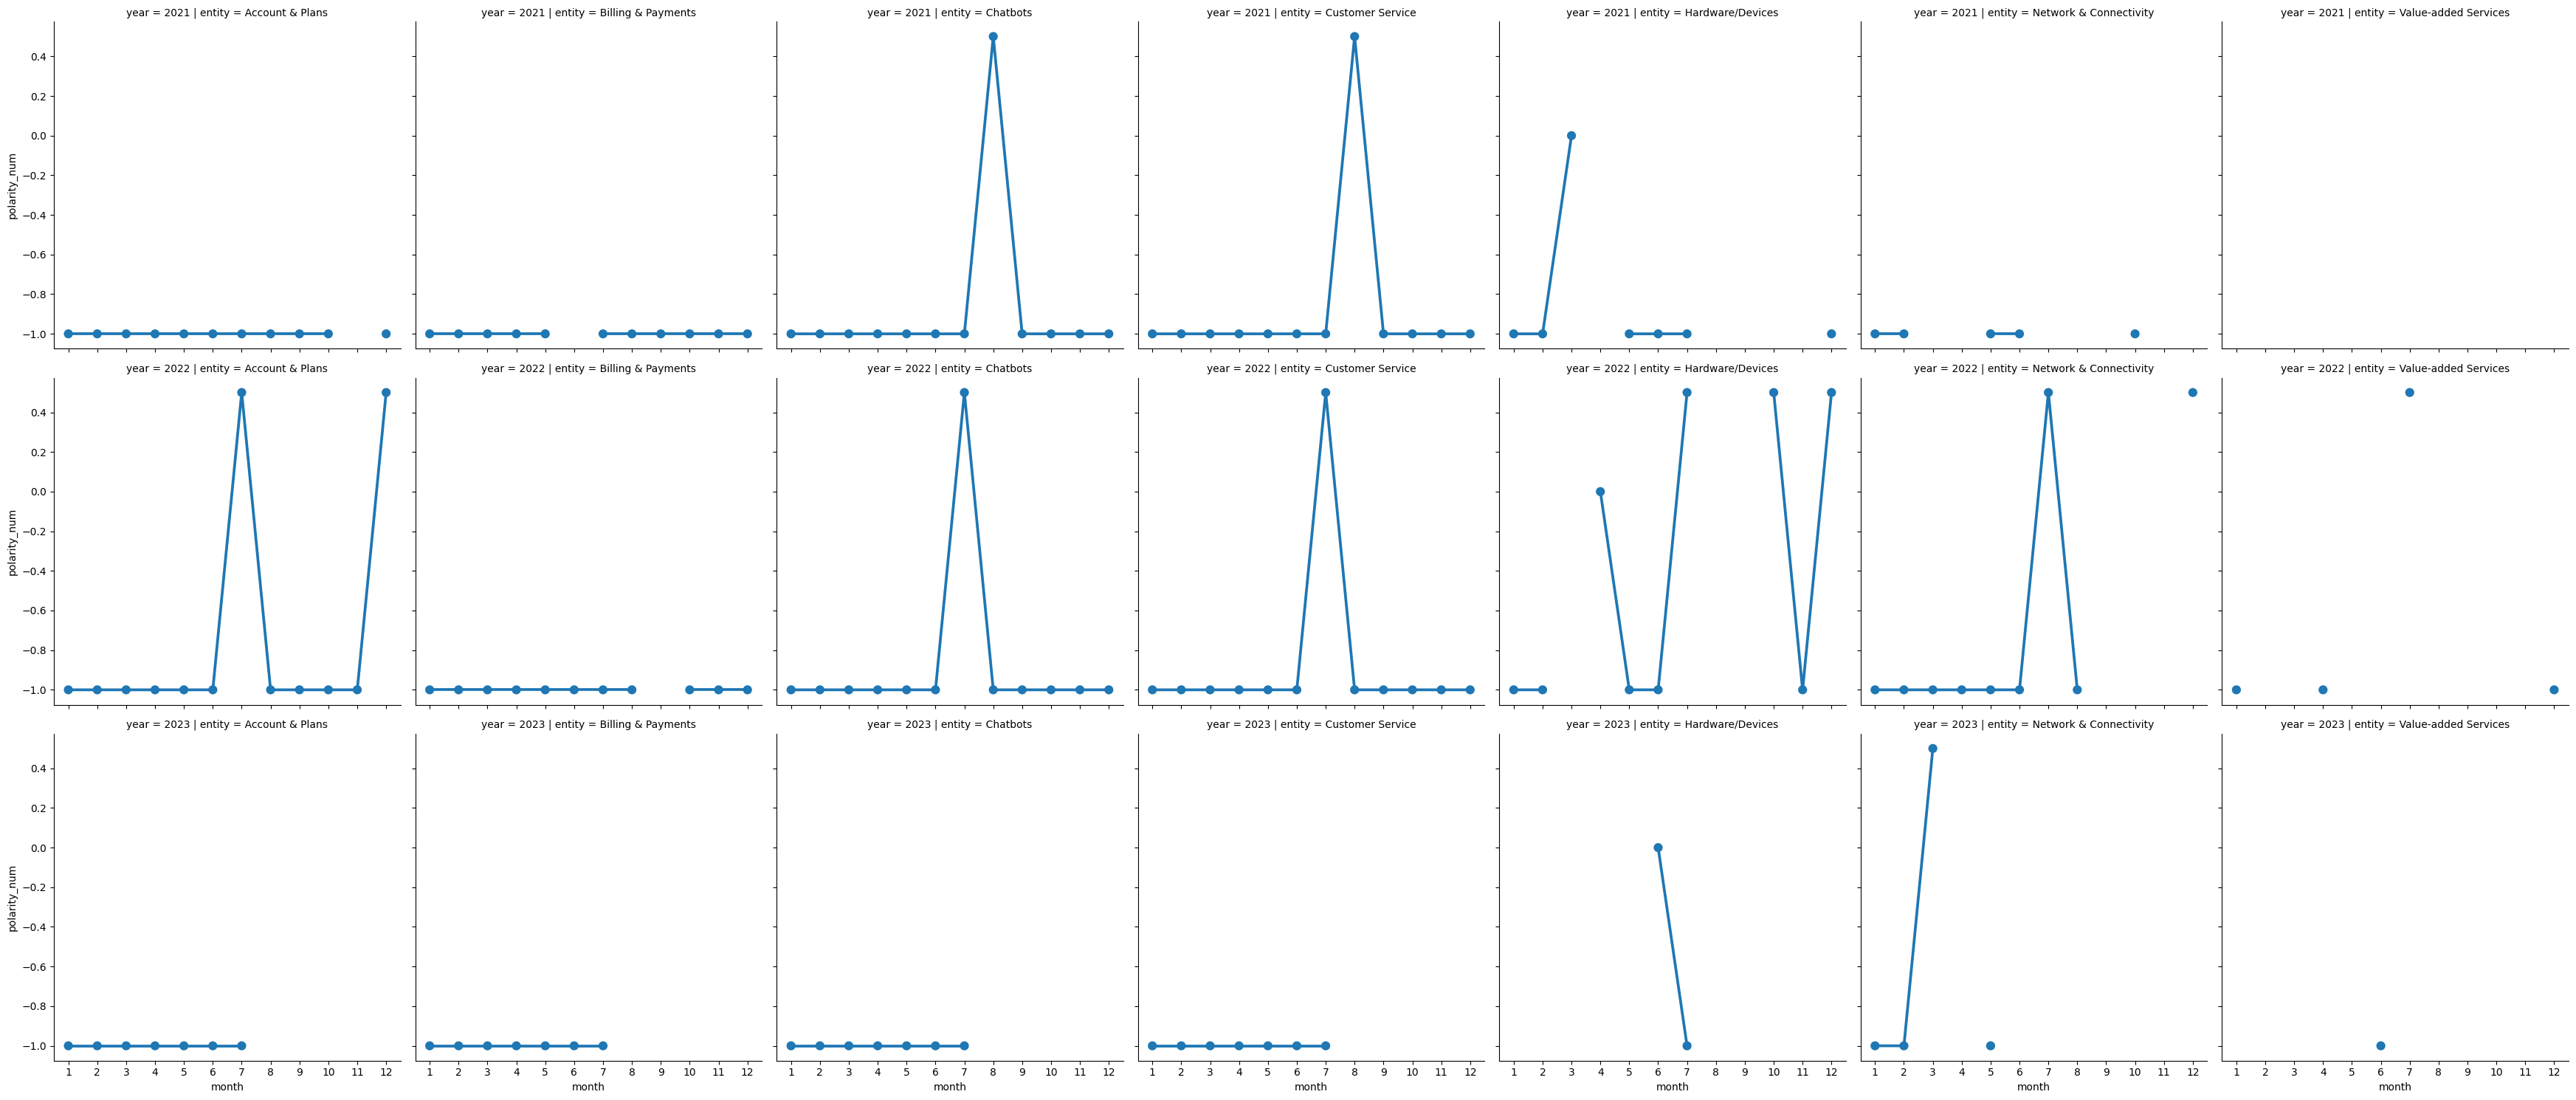

In [142]:
sns.catplot(
    data=df_hp_entity_monthly[df_hp_entity_monthly['business_slug'] == 'vodacom'],
    x='month',
    y="polarity_num",
    col='entity',
    row='year',
    kind='point',
)